EJERCICIO 4
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo.

dict_keys(['Coactivation_matrix', 'Coord'])


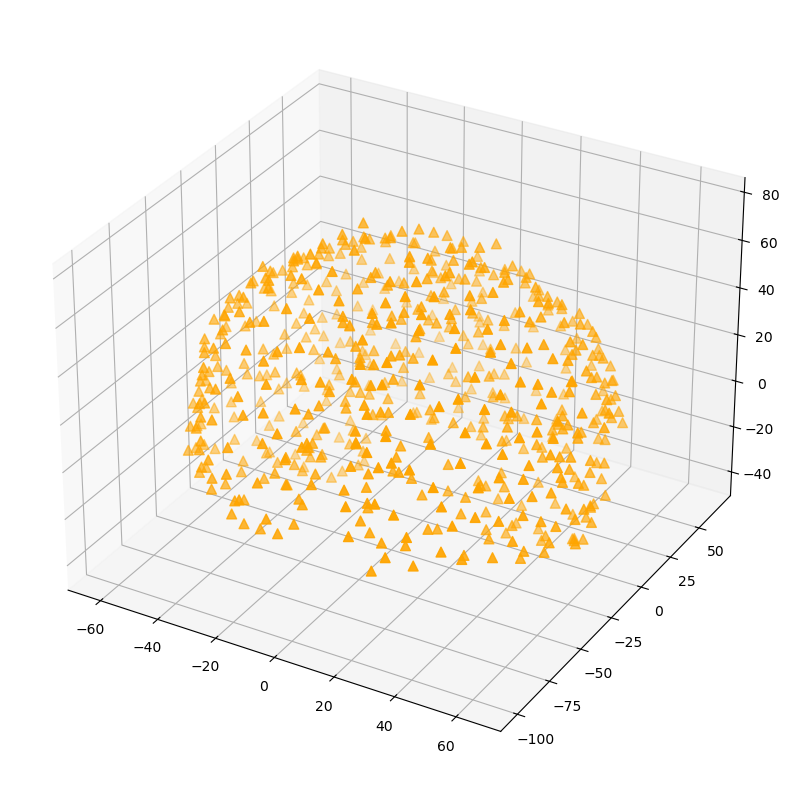

In [27]:
import scipy.io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

archivo = scipy.io.loadmat(r"C:\Users\oswal\OneDrive\Documentos\REPO PROFE\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat")

data_dict = {k: v for k, v in archivo.items() if k[0] != '_'}
matriz = data_dict['Coactivation_matrix']
coord = data_dict['Coord']

fil_mat = np.where(matriz > 0.2, matriz, 0)
G = nx.from_numpy_array(fil_mat)

x, y, z = coord[:, 0], coord[:, 1], coord[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.scatter(x, y, z, c='orange', s=50, label='Nodos', marker='^')

    for edge in G.edges():
        node1, node2 = edge
        x_coords = [x[node1], x[node2]]
        y_coords = [y[node1], y[node2]]
        z_coords = [z[node1], z[node2]]
        ax.plot(x_coords, y_coords, z_coords, c='blue', alpha=0.7)

    ax.set_title("Grafo de la matriz de Coactivación Filtrado")
    ax.set_xlabel('X (equis jsjs)')
    ax.set_ylabel('Y (lle jsjs)')
    ax.set_zlabel('Z (seta jsjs)')
    ax.legend()
    return fig,

def animate(frame):
    ax.view_init(elev=20, azim=frame)
    return fig,

ani = FuncAnimation(fig, animate, init_func=init, frames=360, interval=50, blit=False)

print(data_dict.keys())

ax.scatter(x, y, z, c='orange', s=50, label='Nodos', marker='^')
plt.show()

plt.show()
